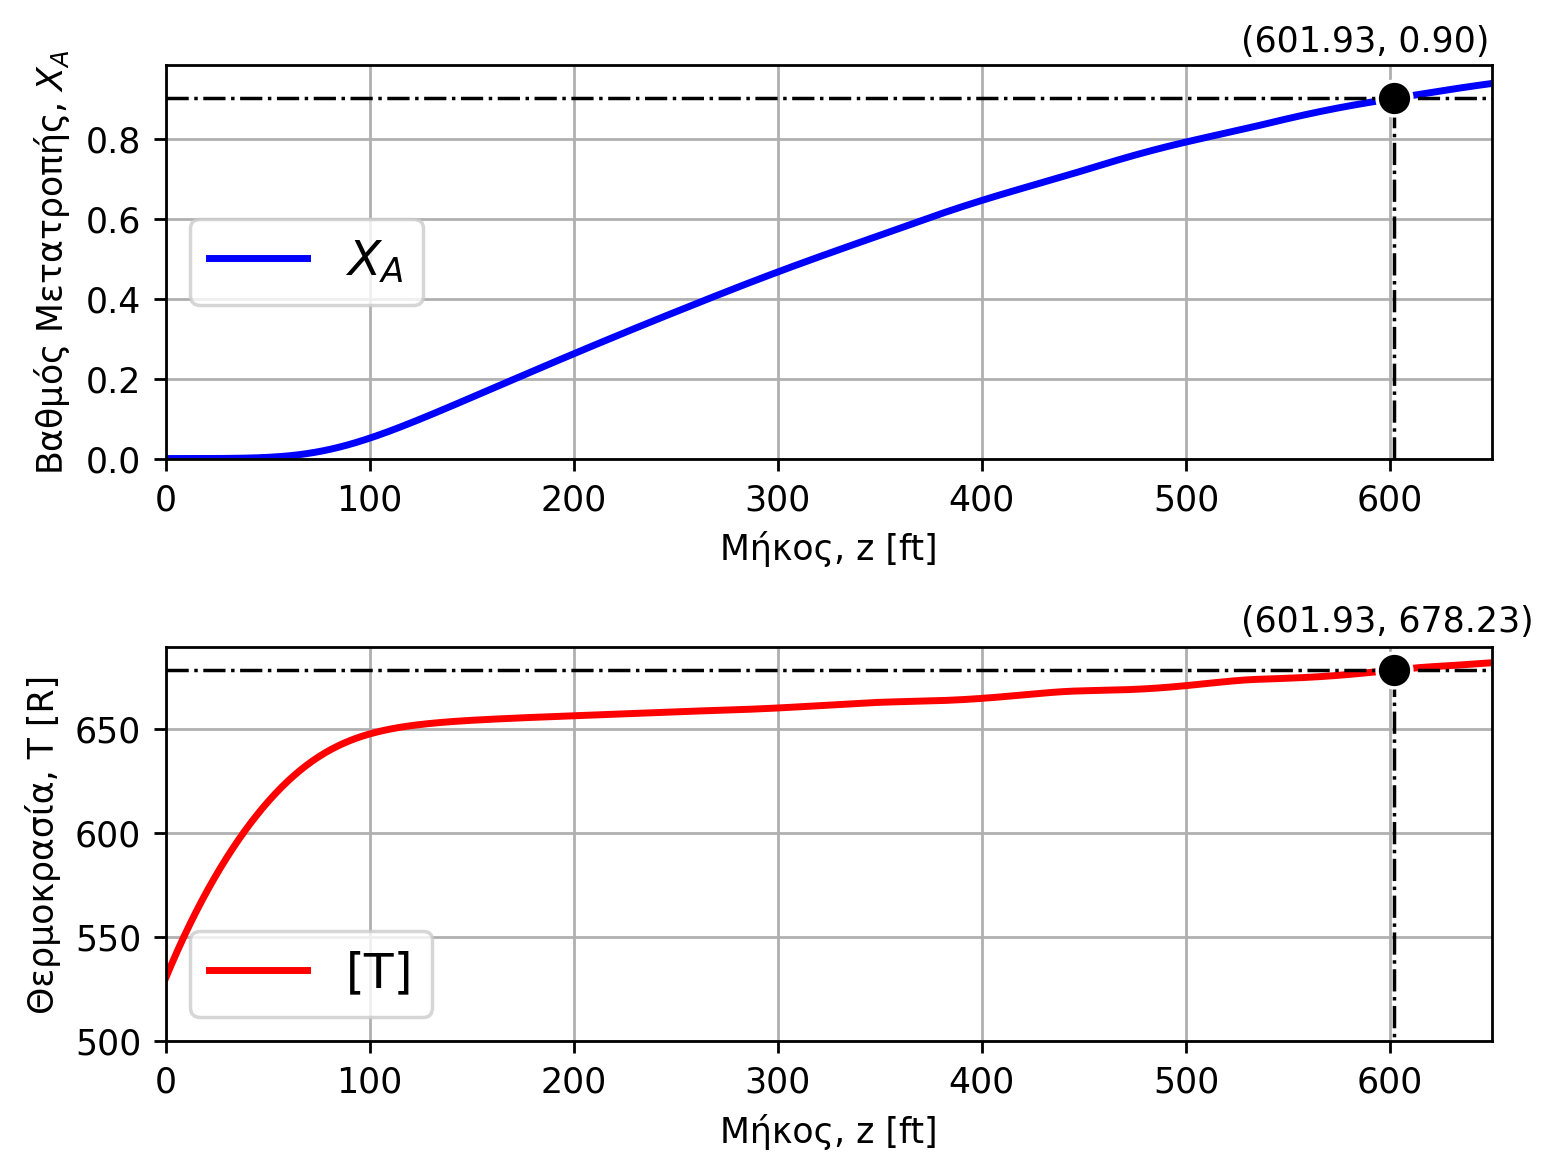

In [32]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the model function
def SXA_I_Example_8p2(z, X):
    """
    Numerical Integration of heated PFR
    """
    # Model Parameters
    mo = 10000                  # Inlet mass flowrate [lb/h]
    Ta = 700                    # Heating Steam Temperature [R]
    D = 0.0833                  # Tube diameter [ft]
    rho = 80                    # Average Density of reaction mixture [lb/ft^3]
    MWA = 200                   # Molecular weight of A [lb/lb-mol]   
    Uh = 400                    # Heat transfer coefficient based on internal diameter [BTU/h/ft^2/R]
    Cp = 0.75                   # Average heat capacity of reaction mixture [BTU/lb/R]
    k0 = 203e15                 # Frequency factor [1/h]
    E  = 46486                  # Activation energy (E)
    DHr = 40000                 # Enthalpy of reaction at 70 F [BTU/lb-mol]
    Rc = 1.987                  # Universal Gas Constant [BTU/lb-mol/R]

    # Extract state variables
    Xa = X[0]                   # Conversion
    T = X[1]                    # Temperature

    # Rate & other Algebraic Equations
    k = k0 * np.exp(-E / (Rc * T))
    S = (np.pi * D**2) / 4
    Qo = mo / rho
    R_rate = S * k * (1 - Xa) / Qo
    Fao = mo / MWA

    # Differential Equations
    dXa_dz = R_rate                                                                      # d[Xa]/dz
    dT_dz = -DHr * R_rate / (Cp * MWA) + np.pi * D * Uh * (Ta - T) / (Fao * Cp * MWA)   # d[T]/dz

    return [dXa_dz, dT_dz]

# Integration scale
zspan = (0, 650)  # Integration interval
z_eval = np.linspace(zspan[0], zspan[1], 650) # Evaluation points
# Initial Conditions
Init_Cond = [0, 530]  # [Conversion, Temperature]

# Solve the system of equations using solve_ivp
sol = solve_ivp(SXA_I_Example_8p2, zspan, Init_Cond, method='RK45', t_eval=z_eval)  # Evaluation points

# Extract results
z = sol.t         # Integration points
Xa = sol.y[0]     # Conversion
T = sol.y[1]      # Temperature

# Find the Reactor Volume for which XA = 0.9
Xa_index = np.where(np.logical_and(Xa >= 0.9, Xa <= 0.91))[0][0]
Xaf = Xa[Xa_index]
XaT = T[Xa_index]
Xaz = z[Xa_index]

# Set up high-resolution plotting
plt.figure(dpi=250)

# Conversion plot
plt.subplot(2,1,1)
plt.plot(z, Xa, 'b-', linewidth=2)
plt.grid(True)
plt.legend(['$X_A$'], fontsize=14)
plt.xlabel('Μήκος, z [ft]', fontsize=10)
plt.ylabel('Βαθμός Μετατροπής, $X_A$', fontsize=10)
plt.xlim(left=0, right=650)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0

# Mark and label intersection points
plt.scatter(Xaz, Xaf, color='black', s=100, edgecolor='white', zorder=5)
plt.text(Xaz-75, Xaf+0.1, f'({Xaz:.2f}, {Xaf:.2f})', color='black', fontsize=10, ha='left', va='bottom')

# Plot red dashed lines to mark Xav and Xaf
plt.plot([Xaz, Xaz], [0, np.amax(Xa)], 'k-.', lw=1)  # Vertical line at Xaz
plt.plot([0, np.amax(z)], [Xaf, Xaf], 'k-.', lw=1)  # Horizontal line at Xaf

# Temperature plot
plt.subplot(2,1,2)
plt.plot(z, T, 'r-', linewidth=2)
plt.grid(True)
plt.legend(['[T]'], fontsize=14)
plt.xlabel('Μήκος, z [ft]', fontsize=10)
plt.ylabel('Θερμοκρασία, Τ [R]', fontsize=10)
plt.xlim(left=0, right=650)  # X-axis starts at 0
plt.ylim(bottom=500)  # Y-axis starts at 860

# Mark and label intersection points
plt.scatter(Xaz, XaT, color='black', s=100, edgecolor='white', zorder=5)
plt.text(Xaz-75, XaT+15, f'({Xaz:.2f}, {XaT:.2f})', color='black', fontsize=10, ha='left', va='bottom')

# Plot red dashed lines to mark Xav and Xaf
plt.plot([Xaz, Xaz], [0, np.amax(T)], 'k-.', lw=1)  # Vertical line at Xaz
plt.plot([0, np.amax(z)], [XaT, XaT], 'k-.', lw=1)  # Horizontal line at XaT


plt.tight_layout()
plt.show()

In [30]:
%reset -f